In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob
import re
import pandas as pd 

import csv
import operator

In [3]:
from os import system

In [4]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev609+master.e0e7c8c
katdal version: 0.7.2.dev386+master.ec7699d
katpoint version: 0.7.dev318+master.6f21089
katsdpscripts version: 0.1.dev2656+master.0a88762


In [5]:
!ls /var/kat/archive3

comm-data  data


In [6]:
h5_filename ='/var/kat/archive3/data/MeerKATAR1/telescope_products/2017/11/19/1511125023.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2017/11/19/1511125023.h5


In [7]:
d = katdal.open(h5_filename);
ant_list,ants = [],[]
[ant_list.append(ant.name) for ant in d.ants]
print(ant_list)
ants = ",".join(ants)
print ants

DEBUG: Added '0008-421' [radec] (and 1 aliases)
DEBUG: Added '0023-263' [radec] (and 1 aliases)
DEBUG: Added '0056-001' [radec] (and 1 aliases)
DEBUG: Added '3C48' [radec] (and 1 aliases)
DEBUG: Added '0237-233' [radec] (and 1 aliases)
DEBUG: Added '0252-712' [radec] (and 1 aliases)
DEBUG: Added 'CTA21' [radec] (and 1 aliases)
DEBUG: Added '0408-658' [radec] (and 1 aliases)
DEBUG: Added '0428+205' [radec] (and 1 aliases)
DEBUG: Added '3C138' [radec] (and 1 aliases)
DEBUG: Added '0537-441' [radec] (and 1 aliases)
DEBUG: Added '0614-349' [radec] (and 1 aliases)
DEBUG: Added '0723-008' [radec] (and 1 aliases)
DEBUG: Added '0733-174' [radec] (and 1 aliases)
DEBUG: Added '0823-500' [radec] (and 1 aliases)
DEBUG: Added '3C237' [radec] (and 1 aliases)
DEBUG: Added '1127-145' [radec] (and 1 aliases)
['m017', 'm022', 'm024', 'm028', 'm033', 'm039', 'm041', 'm043', 'm044', 'm048', 'm051', 'm052', 'm053', 'm054', 'm055', 'm062']



In [8]:
#ant_list.remove('m028') # had low signal power
#ant_list.remove('m036') # no signal part way through
#ant_list.remove('m045') # Not tracking
#print ant_list
ants=','.join(ant_list)
print ants
%set_env ants=$ants

m017,m022,m024,m028,m033,m039,m041,m043,m044,m048,m051,m052,m053,m054,m055,m062
env: ants=m017,m022,m024,m028,m033,m039,m041,m043,m044,m048,m051,m052,m053,m054,m055,m062


In [9]:
ref_ant='m033'
%set_env ref_ant=$ref_ant

env: ref_ant=m033



Loading and processing data...

antennas (16): m017, m022, m024, m028, m033 (*ref*), m039, m041, m043, m044, m048, m051, m052, m053, m054, m055, m062 [pol H]
baselines (120): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 7-15 8-15 9-15 10-15 11-15 12-15 13-15 14-15 0-9 0-10 0-11 0-12 0-13 0-14 0-15 1-10 1-11 1-12 1-13 1-14 1-15 2-11 2-12 2-13 2-14 2-15 3-12 3-13 3-14 3-15 4-13 4-14 4-15 5-14 5-15 6-15
scan   0 (   6 samples) skipped 'slew'
scan   1 (  16 samples) 0.033 0.032 0.032 0.032 0.033 0.031 0.034 0.034 0.032 0.033 0.035 0.034 0.032 0.032 0.035 0.051 0.049 0.048 0.048 0.051 0.051 0.034 0.033 0.033 0.034 0.035 0.035 0.052 0.033 0.033 0.032 0.033

scan  21 (  15 samples) 0.035 0.034 0.034 0.034 0.034 0.033 0.036 0.036 0.035 0.035 0.035 0.036 0.034 0.034 0.037 0.053 0.053 0.051 0.051 0.055 0.054 0.037 0.036 0.034 0.035 0.037 0.036 0.054 0.036 0.035 0.034 0.034 0.036 0.036 0.053 0.035 0.038 0.036 0.037 0.038 0.039 0.058 0.038 0.037 0.033 0.034 0.035 0.035 0.052 0.035 0.034 0.037 0.034 0.036 0.034 0.052 0.035 0.035 0.037 0.034 0.038 0.037 0.055 0.038 0.037 0.040 0.036 0.035 0.036 0.054 0.037 0.036 0.039 0.036 0.035 0.038 0.054 0.037 0.036 0.038 0.035 0.035 0.038 0.035 0.037 0.035 0.037 0.034 0.034 0.037 0.036 0.036 0.039 0.034 0.035 0.037 0.036 0.037 0.036 0.034 0.034 0.037 0.037 0.037 0.036 0.033 0.035 0.034 0.035 0.034 0.036 0.035 0.035 0.035 0.037 0.036 0.037 0.036 0.037 0.053 '0537-441'
scan  22 (   3 samples) skipped 'slew'
scan  23 (  15 samples) 0.053 0.050 0.049 0.051 0.051 0.047 0.054 0.054 0.051 0.052 0.052 0.052 0.051 0.053 0.053 0.081 0.078 0.074 0.077 0.080 0.084 0.054 0.054 0.050 0.051 0.055 0.055 0.079 0.052 0.052 0.

scan  43 (  16 samples) 0.020 0.020 0.019 0.019 0.020 0.019 0.020 0.020 0.019 0.020 0.021 0.021 0.020 0.020 0.021 0.030 0.029 0.028 0.030 0.031 0.031 0.021 0.021 0.020 0.020 0.021 0.022 0.031 0.020 0.020 0.018 0.020 0.020 0.021 0.030 0.020 0.020 0.020 0.020 0.021 0.021 0.030 0.021 0.020 0.019 0.019 0.020 0.019 0.028 0.020 0.019 0.020 0.019 0.020 0.020 0.029 0.020 0.019 0.020 0.020 0.021 0.022 0.031 0.022 0.021 0.021 0.021 0.020 0.020 0.030 0.022 0.021 0.021 0.020 0.020 0.021 0.031 0.021 0.020 0.020 0.020 0.020 0.021 0.021 0.020 0.019 0.020 0.019 0.019 0.021 0.020 0.020 0.021 0.020 0.020 0.021 0.021 0.021 0.020 0.020 0.019 0.021 0.020 0.020 0.020 0.019 0.020 0.019 0.019 0.019 0.021 0.020 0.020 0.019 0.021 0.020 0.020 0.021 0.020 0.030 'CTA21'
scan  44 (  12 samples) skipped 'slew'
scan  45 (  16 samples) 0.010 0.010 0.010 0.010 0.010 0.009 0.011 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.015 0.015 0.014 0.014 0.015 0.015 0.010 0.010 0.010 0.010 0.010 0.010 0.016 0.010 0.010 0.010

scan  65 (  15 samples) 0.060 0.057 0.056 0.061 0.059 0.060 0.062 0.061 0.059 0.063 0.064 0.062 0.060 0.062 0.065 0.097 0.093 0.092 0.088 0.099 0.095 0.063 0.062 0.059 0.058 0.067 0.067 0.093 0.061 0.059 0.058 0.062 0.062 0.063 0.096 0.065 0.065 0.062 0.061 0.065 0.066 0.097 0.065 0.065 0.058 0.058 0.063 0.064 0.088 0.061 0.063 0.063 0.060 0.062 0.060 0.090 0.065 0.062 0.064 0.058 0.067 0.064 0.097 0.069 0.064 0.067 0.064 0.062 0.065 0.099 0.066 0.064 0.067 0.061 0.061 0.066 0.093 0.064 0.062 0.065 0.064 0.061 0.066 0.063 0.064 0.063 0.062 0.060 0.061 0.065 0.066 0.063 0.065 0.061 0.063 0.066 0.062 0.064 0.063 0.061 0.060 0.064 0.061 0.061 0.063 0.059 0.063 0.059 0.059 0.060 0.065 0.062 0.062 0.061 0.065 0.063 0.064 0.063 0.064 0.092 '0056-001'
scan  66 (   4 samples) skipped 'slew'
scan  67 (  15 samples) 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.012 0.011 0.011 0.012 0.012 0.011 0.012 0.012 0.017 0.016 0.016 0.016 0.017 0.016 0.012 0.012 0.011 0.012 0.012 0.012 0.017 0.012 0.011 0.

scan  87 (  15 samples) 0.065 0.059 0.060 0.062 0.062 0.058 0.064 0.063 0.064 0.064 0.068 0.062 0.060 0.062 0.067 0.096 0.095 0.090 0.090 0.095 0.094 0.066 0.066 0.061 0.063 0.067 0.069 0.093 0.063 0.062 0.059 0.060 0.064 0.066 0.093 0.066 0.066 0.063 0.061 0.065 0.065 0.097 0.068 0.063 0.060 0.062 0.064 0.063 0.093 0.064 0.061 0.063 0.060 0.066 0.063 0.089 0.063 0.059 0.063 0.063 0.068 0.068 0.100 0.069 0.071 0.067 0.065 0.067 0.065 0.096 0.067 0.066 0.065 0.063 0.061 0.068 0.094 0.065 0.063 0.066 0.064 0.067 0.067 0.066 0.063 0.062 0.063 0.062 0.062 0.064 0.065 0.067 0.069 0.063 0.063 0.066 0.064 0.062 0.062 0.062 0.061 0.066 0.066 0.065 0.063 0.061 0.064 0.065 0.062 0.060 0.066 0.065 0.062 0.061 0.065 0.065 0.062 0.065 0.067 0.093 '0733-174'
scan  88 (   5 samples) skipped 'slew'
scan  89 (  15 samples) 0.029 0.027 0.027 0.028 0.027 0.027 0.029 0.028 0.028 0.028 0.028 0.029 0.027 0.028 0.030 0.042 0.041 0.040 0.041 0.042 0.043 0.029 0.028 0.028 0.029 0.030 0.029 0.042 0.028 0.027 0.

scan 109 (  16 samples) 0.050 0.041 0.052 0.052 0.050 0.050 0.062 0.064 0.050 0.063 0.056 0.050 0.041 0.043 0.059 0.069 0.056 0.057 0.062 0.069 0.057 0.041 0.054 0.050 0.042 0.057 0.042 0.058 0.050 0.051 0.048 0.057 0.043 0.047 0.060 0.050 0.050 0.050 0.049 0.047 0.053 0.069 0.053 0.046 0.057 0.054 0.064 0.054 0.055 0.058 0.048 0.050 0.064 0.067 0.058 0.067 0.049 0.044 0.048 0.048 0.057 0.059 0.059 0.047 0.047 0.053 0.051 0.050 0.051 0.058 0.043 0.048 0.053 0.036 0.061 0.062 0.055 0.043 0.050 0.046 0.046 0.056 0.061 0.057 0.061 0.049 0.057 0.066 0.064 0.063 0.061 0.069 0.050 0.056 0.065 0.055 0.054 0.047 0.079 0.055 0.064 0.049 0.040 0.043 0.071 0.055 0.042 0.043 0.041 0.066 0.048 0.042 0.041 0.072 0.045 0.054 0.083 0.055 0.069 0.084 '0537-441'
scan 110 (   4 samples) skipped 'slew'
scan 111 (  15 samples) 0.052 0.053 0.052 0.052 0.051 0.052 0.055 0.052 0.053 0.052 0.054 0.052 0.053 0.051 0.055 0.080 0.078 0.080 0.078 0.080 0.081 0.054 0.052 0.054 0.052 0.054 0.055 0.080 0.052 0.052 0.

scan 131 (  15 samples) 0.010 0.010 0.010 0.010 0.010 0.009 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.015 0.014 0.014 0.014 0.015 0.015 0.010 0.010 0.010 0.010 0.011 0.010 0.015 0.010 0.010 0.010 0.010 0.010 0.010 0.015 0.010 0.010 0.010 0.010 0.010 0.010 0.015 0.010 0.010 0.010 0.010 0.010 0.010 0.015 0.010 0.010 0.010 0.010 0.010 0.010 0.014 0.010 0.010 0.010 0.009 0.011 0.011 0.016 0.011 0.010 0.011 0.010 0.010 0.010 0.016 0.011 0.010 0.011 0.010 0.010 0.011 0.015 0.010 0.010 0.011 0.010 0.010 0.010 0.011 0.010 0.010 0.010 0.010 0.009 0.010 0.010 0.010 0.010 0.010 0.010 0.011 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.009 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.010 0.011 0.010 0.010 0.010 0.010 0.015 '0408-658'
scan 132 (  11 samples) skipped 'slew'
scan 133 (  15 samples) 0.042 0.039 0.042 0.039 0.039 0.039 0.042 0.043 0.039 0.040 0.042 0.043 0.040 0.041 0.044 0.060 0.061 0.059 0.058 0.063 0.063 0.043 0.044 0.039 0.041 0.043 0.043 0.065 0.042 0.041 0.

scan 153 (  15 samples) 0.026 0.025 0.025 0.026 0.025 0.024 0.026 0.026 0.025 0.025 0.027 0.025 0.025 0.026 0.027 0.039 0.038 0.037 0.038 0.039 0.040 0.027 0.026 0.025 0.026 0.027 0.027 0.039 0.026 0.026 0.025 0.025 0.026 0.026 0.038 0.027 0.025 0.025 0.026 0.026 0.026 0.039 0.027 0.026 0.024 0.025 0.026 0.025 0.037 0.026 0.025 0.026 0.024 0.025 0.025 0.038 0.025 0.025 0.025 0.025 0.027 0.027 0.040 0.027 0.027 0.028 0.026 0.026 0.028 0.041 0.028 0.027 0.028 0.027 0.027 0.028 0.039 0.026 0.026 0.027 0.026 0.025 0.027 0.028 0.026 0.025 0.026 0.025 0.025 0.026 0.027 0.026 0.026 0.025 0.025 0.027 0.028 0.026 0.026 0.025 0.024 0.027 0.027 0.026 0.025 0.024 0.026 0.026 0.025 0.024 0.027 0.027 0.026 0.024 0.028 0.027 0.026 0.026 0.026 0.037 '0237-233'
scan 154 (   6 samples) skipped 'slew'
scan 155 (  15 samples) 0.027 0.025 0.025 0.026 0.025 0.024 0.026 0.026 0.026 0.026 0.026 0.027 0.025 0.026 0.027 0.039 0.038 0.037 0.039 0.040 0.039 0.027 0.027 0.026 0.026 0.027 0.028 0.040 0.027 0.026 0.

scan 175 (  15 samples) 0.078 0.024 0.033 0.073 0.081 0.025 0.075 0.085 0.025 0.107 0.037 0.028 0.024 0.027 0.046 0.092 0.083 0.036 0.095 0.102 0.039 0.063 0.068 0.036 0.070 0.075 0.026 0.069 0.025 0.025 0.024 0.024 0.025 0.026 0.038 0.025 0.078 0.025 0.080 0.080 0.031 0.061 0.119 0.025 0.055 0.105 0.128 0.064 0.086 0.103 0.025 0.170 0.110 0.116 0.085 0.140 0.093 0.025 0.131 0.199 0.069 0.066 0.085 0.088 0.026 0.110 0.158 0.134 0.026 0.047 0.029 0.026 0.033 0.069 0.050 0.079 0.097 0.129 0.026 0.134 0.246 0.228 0.142 0.117 0.164 0.043 0.240 0.217 0.180 0.227 0.171 0.228 0.104 0.149 0.107 0.118 0.036 0.137 0.146 0.127 0.083 0.091 0.048 0.105 0.218 0.024 0.025 0.025 0.025 0.077 0.093 0.063 0.103 0.184 0.079 0.139 0.188 0.070 0.148 0.168 '3C237'
scan 176 (   4 samples) skipped 'slew'
scan 177 (  15 samples) 0.035 0.034 0.033 0.033 0.034 0.033 0.035 0.036 0.033 0.035 0.035 0.034 0.033 0.034 0.037 0.052 0.051 0.048 0.050 0.053 0.052 0.034 0.034 0.033 0.033 0.037 0.036 0.052 0.034 0.034 0.032

scan 197 (  15 samples) 0.064 0.064 0.067 0.065 0.062 0.061 0.065 0.064 0.063 0.065 0.065 0.064 0.063 0.065 0.064 0.099 0.091 0.091 0.093 0.097 0.094 0.065 0.064 0.065 0.066 0.071 0.068 0.100 0.066 0.063 0.064 0.062 0.064 0.065 0.094 0.066 0.065 0.063 0.063 0.066 0.067 0.096 0.064 0.064 0.062 0.062 0.062 0.064 0.096 0.064 0.062 0.066 0.063 0.063 0.063 0.092 0.064 0.063 0.062 0.060 0.066 0.067 0.099 0.068 0.066 0.067 0.063 0.063 0.071 0.101 0.072 0.067 0.068 0.066 0.065 0.070 0.095 0.068 0.064 0.066 0.061 0.064 0.066 0.066 0.066 0.066 0.063 0.061 0.063 0.065 0.067 0.061 0.064 0.064 0.062 0.069 0.069 0.065 0.063 0.062 0.062 0.067 0.067 0.065 0.065 0.060 0.067 0.066 0.063 0.060 0.064 0.067 0.067 0.061 0.068 0.067 0.064 0.067 0.065 0.094 '0733-174'
scan 198 (  10 samples) skipped 'slew'
scan 199 (  15 samples) 0.028 0.028 0.027 0.028 0.028 0.027 0.029 0.029 0.029 0.028 0.029 0.028 0.028 0.029 0.030 0.041 0.041 0.041 0.040 0.042 0.041 0.029 0.030 0.028 0.028 0.029 0.029 0.043 0.028 0.028 0.

scan 219 (  15 samples) 0.028 0.028 0.027 0.028 0.028 0.027 0.031 0.031 0.029 0.030 0.031 0.030 0.029 0.029 0.031 0.046 0.044 0.043 0.043 0.045 0.044 0.030 0.030 0.028 0.028 0.032 0.030 0.046 0.030 0.029 0.028 0.029 0.030 0.031 0.045 0.032 0.030 0.029 0.029 0.031 0.031 0.046 0.031 0.030 0.028 0.028 0.029 0.028 0.042 0.030 0.029 0.029 0.029 0.029 0.029 0.043 0.031 0.029 0.030 0.028 0.032 0.032 0.046 0.032 0.030 0.032 0.030 0.029 0.032 0.046 0.033 0.032 0.032 0.030 0.031 0.034 0.046 0.030 0.030 0.030 0.030 0.030 0.032 0.032 0.030 0.029 0.030 0.029 0.028 0.031 0.031 0.030 0.031 0.029 0.030 0.032 0.032 0.029 0.029 0.029 0.029 0.031 0.032 0.030 0.029 0.028 0.030 0.030 0.028 0.029 0.031 0.030 0.029 0.028 0.033 0.031 0.030 0.031 0.029 0.044 '0723-008'
scan 220 (   4 samples) skipped 'slew'
scan 221 (  15 samples) 0.063 0.062 0.061 0.063 0.063 0.062 0.065 0.064 0.066 0.066 0.068 0.066 0.064 0.062 0.067 0.095 0.093 0.091 0.094 0.094 0.096 0.067 0.065 0.061 0.064 0.066 0.068 0.093 0.067 0.062 0.

scan 241 (  15 samples) 0.028 0.028 0.027 0.027 0.027 0.027 0.031 0.030 0.028 0.029 0.030 0.030 0.029 0.029 0.030 0.045 0.044 0.043 0.043 0.046 0.044 0.030 0.030 0.028 0.029 0.031 0.030 0.046 0.030 0.029 0.028 0.029 0.029 0.030 0.044 0.030 0.030 0.029 0.029 0.030 0.031 0.045 0.031 0.030 0.028 0.028 0.029 0.028 0.042 0.029 0.028 0.029 0.029 0.029 0.029 0.042 0.030 0.028 0.029 0.027 0.031 0.031 0.046 0.031 0.031 0.031 0.030 0.029 0.031 0.045 0.032 0.031 0.032 0.030 0.031 0.033 0.045 0.030 0.030 0.030 0.029 0.029 0.031 0.032 0.030 0.029 0.029 0.028 0.029 0.031 0.030 0.029 0.030 0.029 0.029 0.032 0.031 0.029 0.029 0.029 0.029 0.030 0.031 0.029 0.029 0.027 0.029 0.030 0.028 0.028 0.030 0.030 0.028 0.029 0.032 0.031 0.029 0.030 0.029 0.042 '0723-008'
scan 242 (   3 samples) skipped 'slew'
scan 243 (  16 samples) 0.063 0.062 0.063 0.065 0.064 0.061 0.065 0.063 0.060 0.062 0.066 0.067 0.061 0.059 0.063 0.097 0.094 0.092 0.094 0.095 0.094 0.067 0.065 0.061 0.066 0.065 0.066 0.095 0.066 0.061 0.

scan 263 (  15 samples) 0.062 0.060 0.057 0.062 0.060 0.060 0.068 0.063 0.063 0.062 0.066 0.063 0.066 0.063 0.065 0.091 0.094 0.088 0.091 0.094 0.098 0.064 0.064 0.065 0.064 0.066 0.065 0.098 0.066 0.061 0.059 0.062 0.063 0.063 0.095 0.065 0.064 0.062 0.063 0.067 0.065 0.096 0.064 0.068 0.059 0.060 0.064 0.066 0.090 0.063 0.063 0.063 0.059 0.065 0.062 0.091 0.061 0.064 0.063 0.062 0.064 0.067 0.098 0.069 0.069 0.066 0.064 0.065 0.069 0.101 0.068 0.068 0.067 0.066 0.068 0.070 0.094 0.069 0.064 0.068 0.063 0.063 0.066 0.067 0.062 0.069 0.062 0.060 0.060 0.063 0.065 0.064 0.063 0.061 0.063 0.066 0.070 0.064 0.062 0.060 0.060 0.067 0.066 0.063 0.061 0.059 0.064 0.063 0.062 0.059 0.063 0.064 0.061 0.064 0.066 0.066 0.062 0.064 0.062 0.093 '0733-174'
scan 264 (   8 samples) skipped 'slew'
scan 265 (  15 samples) 0.029 0.028 0.027 0.029 0.027 0.026 0.029 0.028 0.028 0.028 0.028 0.029 0.028 0.029 0.029 0.042 0.041 0.041 0.040 0.042 0.043 0.029 0.029 0.028 0.029 0.029 0.029 0.043 0.028 0.028 0.

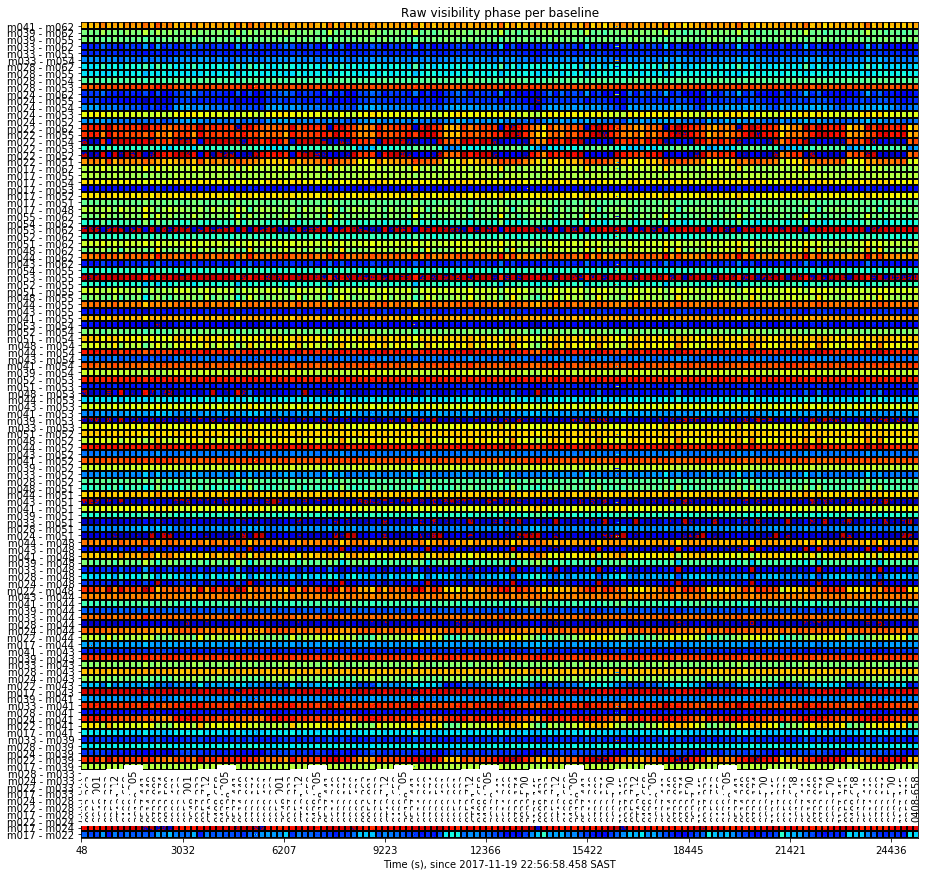

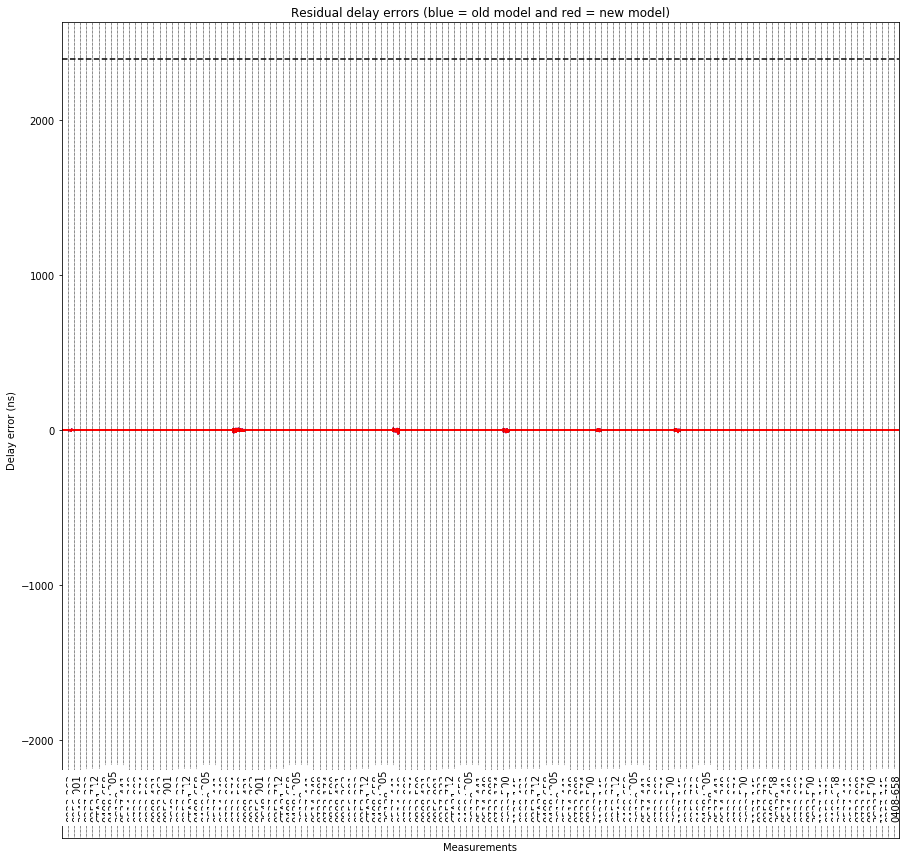

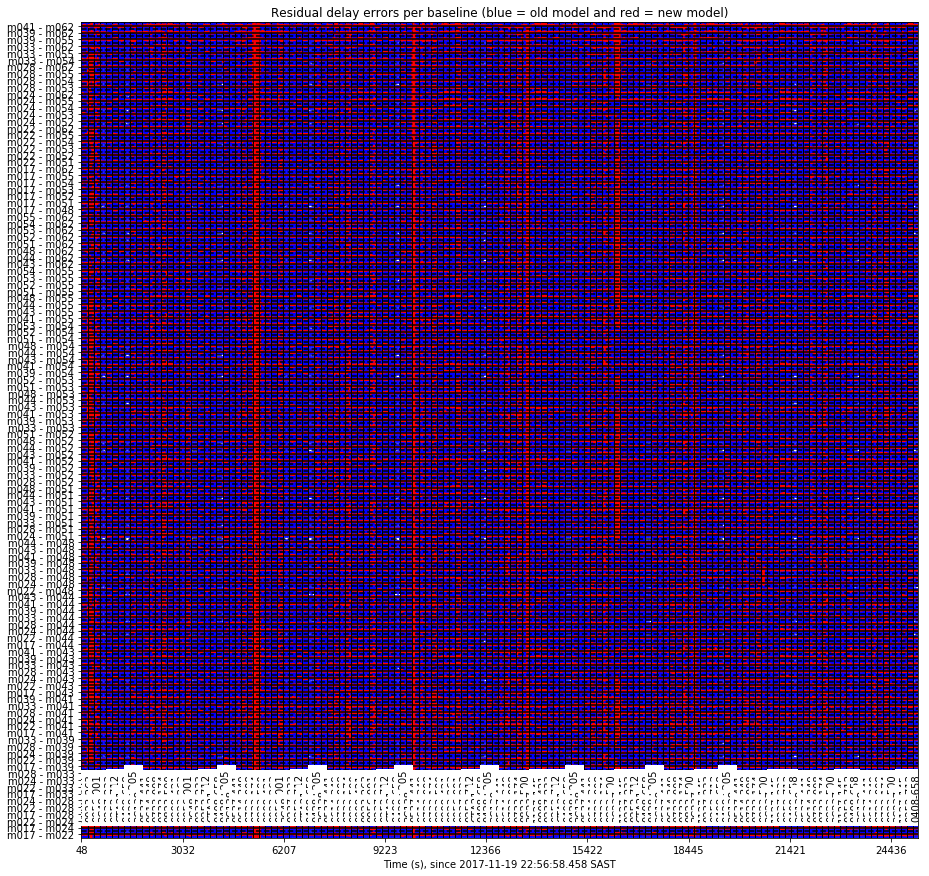

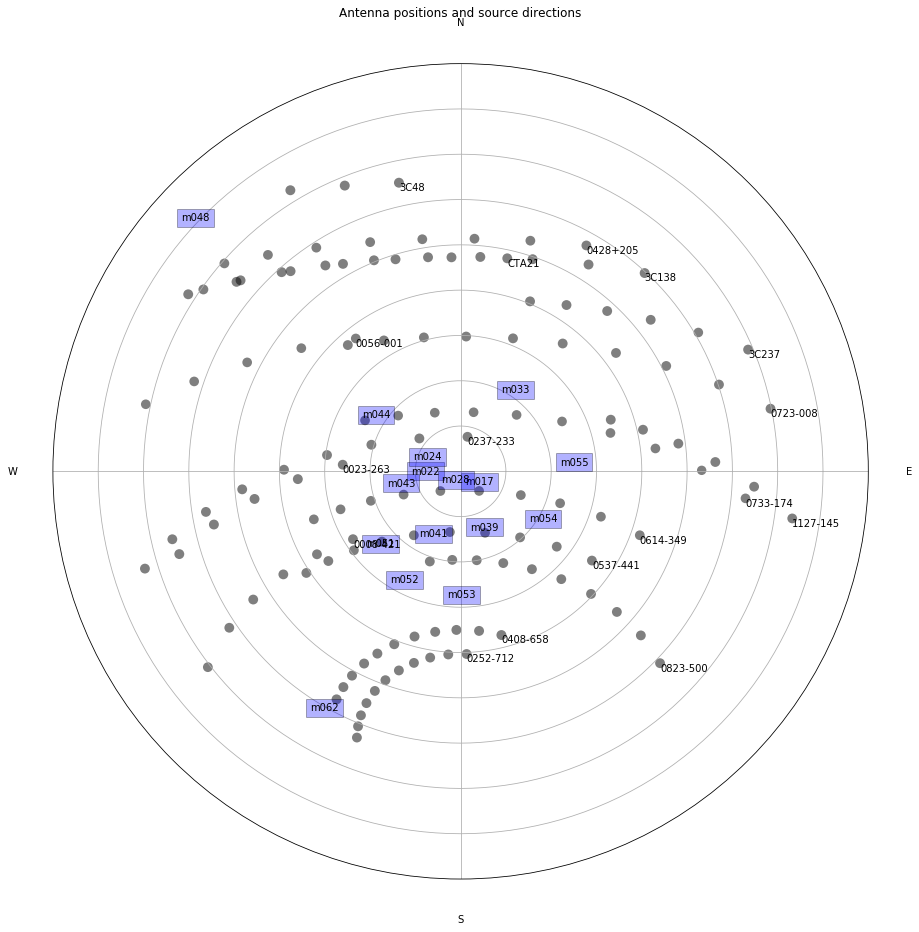

In [10]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run /home/tony/Desktop/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2800 -p 'H' -r $ref_ant \
 -a $ants  $h5_filename



Loading and processing data...

antennas (16): m017, m022, m024, m028, m033 (*ref*), m039, m041, m043, m044, m048, m051, m052, m053, m054, m055, m062 [pol V]
baselines (120): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 7-15 8-15 9-15 10-15 11-15 12-15 13-15 14-15 0-9 0-10 0-11 0-12 0-13 0-14 0-15 1-10 1-11 1-12 1-13 1-14 1-15 2-11 2-12 2-13 2-14 2-15 3-12 3-13 3-14 3-15 4-13 4-14 4-15 5-14 5-15 6-15
scan   0 (   6 samples) skipped 'slew'
scan   1 (  16 samples) 0.035 0.041 0.040 0.250 0.257 0.287 0.038 0.037 0.041 0.256 0.040 0.037 0.041 0.250 0.038 0.037 0.035 0.041 0.258 0.038 0.037 0.038 0.036 0.041 0.263 0.038 0.037 0.038 0.038 0.036 0.041 0.258

scan  21 (  15 samples) 0.039 0.042 0.042 0.264 0.263 0.290 0.040 0.040 0.043 0.282 0.038 0.038 0.042 0.265 0.040 0.040 0.038 0.042 0.275 0.041 0.039 0.039 0.038 0.043 0.269 0.040 0.039 0.040 0.039 0.038 0.042 0.280 0.041 0.039 0.040 0.039 0.041 0.044 0.293 0.042 0.041 0.042 0.042 0.041 0.041 0.268 0.040 0.037 0.038 0.038 0.038 0.040 0.266 0.041 0.038 0.038 0.039 0.039 0.041 0.037 0.041 0.037 0.038 0.039 0.040 0.041 0.038 0.038 0.039 0.038 0.040 0.040 0.041 0.038 0.038 0.039 0.040 0.041 0.041 0.041 0.039 0.039 0.039 0.039 0.039 0.040 0.040 0.037 0.038 0.038 0.039 0.041 0.041 0.038 0.038 0.039 0.039 0.039 0.040 0.037 0.037 0.039 0.038 0.039 0.039 0.041 0.042 0.042 0.043 0.042 0.268 0.276 0.276 0.277 0.041 0.040 0.041 0.039 0.040 0.039 '0537-441'
scan  22 (   3 samples) skipped 'slew'
scan  23 (  15 samples) 0.057 0.063 0.063 0.441 0.441 0.478 0.062 0.059 0.066 0.461 0.057 0.056 0.065 0.442 0.060 0.060 0.057 0.062 0.440 0.061 0.060 0.059 0.058 0.063 0.447 0.061 0.061 0.059 0.058 0.056 0.

scan  43 (  16 samples) 0.022 0.024 0.022 0.143 0.146 0.151 0.022 0.022 0.023 0.145 0.023 0.022 0.023 0.146 0.022 0.022 0.022 0.023 0.148 0.023 0.023 0.023 0.023 0.023 0.142 0.023 0.024 0.023 0.023 0.023 0.022 0.149 0.023 0.023 0.023 0.023 0.022 0.023 0.144 0.023 0.023 0.023 0.023 0.023 0.023 0.139 0.022 0.021 0.022 0.023 0.022 0.022 0.139 0.022 0.023 0.022 0.022 0.022 0.022 0.022 0.023 0.023 0.023 0.023 0.023 0.023 0.023 0.022 0.022 0.022 0.023 0.023 0.022 0.022 0.022 0.022 0.023 0.023 0.023 0.023 0.022 0.022 0.023 0.022 0.022 0.022 0.022 0.022 0.021 0.022 0.022 0.022 0.022 0.022 0.022 0.023 0.022 0.023 0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.023 0.023 0.023 0.022 0.023 0.147 0.147 0.147 0.141 0.022 0.023 0.022 0.023 0.022 0.022 'CTA21'
scan  44 (  12 samples) skipped 'slew'
scan  45 (  16 samples) 0.011 0.012 0.014 0.071 0.072 0.081 0.012 0.012 0.013 0.074 0.011 0.011 0.012 0.069 0.012 0.011 0.011 0.012 0.070 0.012 0.011 0.011 0.011 0.013 0.072 0.012 0.011 0.011 0.011 0.011 0.013

scan  65 (  15 samples) 0.069 0.069 0.067 0.548 0.534 0.588 0.072 0.070 0.072 0.568 0.073 0.071 0.072 0.571 0.073 0.074 0.072 0.074 0.552 0.076 0.071 0.073 0.070 0.072 0.535 0.075 0.077 0.072 0.073 0.070 0.073 0.585 0.073 0.073 0.076 0.076 0.075 0.075 0.568 0.076 0.075 0.074 0.074 0.076 0.072 0.557 0.075 0.075 0.070 0.071 0.076 0.072 0.545 0.073 0.070 0.070 0.075 0.073 0.074 0.069 0.072 0.070 0.073 0.075 0.073 0.075 0.072 0.070 0.074 0.073 0.073 0.073 0.075 0.071 0.070 0.072 0.073 0.076 0.074 0.074 0.073 0.072 0.071 0.073 0.074 0.076 0.072 0.072 0.074 0.074 0.074 0.074 0.075 0.070 0.074 0.074 0.070 0.073 0.074 0.072 0.069 0.071 0.068 0.071 0.074 0.071 0.074 0.069 0.073 0.073 0.579 0.541 0.569 0.543 0.074 0.073 0.075 0.073 0.075 0.073 '0056-001'
scan  66 (   4 samples) skipped 'slew'
scan  67 (  15 samples) 0.012 0.013 0.013 0.074 0.072 0.079 0.013 0.013 0.013 0.078 0.013 0.012 0.013 0.075 0.013 0.013 0.012 0.013 0.075 0.013 0.013 0.012 0.012 0.013 0.075 0.013 0.012 0.013 0.013 0.012 0.

scan  87 (  15 samples) 0.072 0.069 0.068 0.509 0.514 0.507 0.071 0.067 0.072 0.530 0.072 0.066 0.069 0.520 0.070 0.072 0.070 0.069 0.527 0.068 0.074 0.070 0.071 0.070 0.529 0.071 0.070 0.070 0.069 0.069 0.071 0.527 0.071 0.073 0.072 0.072 0.069 0.069 0.523 0.071 0.071 0.071 0.070 0.071 0.069 0.511 0.070 0.071 0.067 0.072 0.069 0.069 0.509 0.070 0.068 0.067 0.070 0.071 0.068 0.069 0.070 0.072 0.068 0.070 0.071 0.071 0.068 0.070 0.068 0.071 0.071 0.071 0.070 0.069 0.071 0.074 0.071 0.071 0.070 0.071 0.072 0.071 0.072 0.072 0.074 0.073 0.070 0.068 0.066 0.073 0.068 0.069 0.070 0.068 0.070 0.068 0.070 0.072 0.068 0.067 0.067 0.070 0.068 0.068 0.068 0.067 0.071 0.069 0.069 0.072 0.522 0.514 0.531 0.506 0.067 0.070 0.068 0.071 0.069 0.069 '0733-174'
scan  88 (   5 samples) skipped 'slew'
scan  89 (  15 samples) 0.031 0.031 0.032 0.207 0.196 0.211 0.032 0.030 0.032 0.201 0.031 0.031 0.031 0.208 0.031 0.032 0.031 0.031 0.203 0.031 0.032 0.032 0.030 0.033 0.209 0.031 0.031 0.032 0.031 0.031 0.

scan 109 (  16 samples) 0.049 0.048 0.053 0.287 0.267 0.301 0.061 0.060 0.054 0.287 0.048 0.051 0.050 0.271 0.056 0.056 0.053 0.050 0.275 0.060 0.043 0.047 0.052 0.056 0.281 0.052 0.048 0.046 0.061 0.053 0.052 0.288 0.052 0.053 0.049 0.055 0.053 0.056 0.304 0.046 0.057 0.058 0.059 0.054 0.061 0.267 0.056 0.041 0.049 0.065 0.053 0.052 0.277 0.048 0.052 0.053 0.051 0.051 0.052 0.047 0.051 0.058 0.052 0.047 0.050 0.054 0.048 0.043 0.043 0.047 0.046 0.057 0.055 0.039 0.053 0.056 0.046 0.051 0.052 0.059 0.048 0.044 0.059 0.059 0.056 0.058 0.060 0.069 0.064 0.057 0.050 0.061 0.051 0.056 0.062 0.055 0.055 0.046 0.079 0.060 0.059 0.052 0.046 0.045 0.065 0.060 0.053 0.048 0.050 0.061 0.278 0.273 0.283 0.283 0.047 0.050 0.073 0.054 0.060 0.070 '0537-441'
scan 110 (   4 samples) skipped 'slew'
scan 111 (  15 samples) 0.056 0.067 0.066 0.446 0.427 0.531 0.063 0.060 0.070 0.461 0.058 0.056 0.066 0.438 0.061 0.058 0.056 0.067 0.448 0.061 0.057 0.059 0.056 0.068 0.444 0.062 0.058 0.059 0.058 0.058 0.

scan 131 (  15 samples) 0.011 0.012 0.012 0.072 0.069 0.073 0.011 0.011 0.012 0.073 0.011 0.011 0.011 0.071 0.011 0.011 0.011 0.012 0.069 0.012 0.011 0.011 0.011 0.012 0.073 0.012 0.011 0.011 0.011 0.011 0.012 0.073 0.012 0.011 0.012 0.011 0.011 0.012 0.073 0.012 0.012 0.011 0.011 0.012 0.011 0.069 0.011 0.011 0.011 0.011 0.011 0.011 0.070 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.012 0.011 0.071 0.071 0.073 0.069 0.011 0.012 0.011 0.011 0.011 0.011 '0408-658'
scan 132 (  11 samples) skipped 'slew'
scan 133 (  15 samples) 0.044 0.051 0.054 0.312 0.310 0.378 0.048 0.049 0.053 0.336 0.046 0.046 0.051 0.325 0.050 0.046 0.044 0.051 0.307 0.049 0.047 0.048 0.048 0.049 0.329 0.050 0.047 0.048 0.047 0.046 0.

scan 153 (  15 samples) 0.027 0.031 0.030 0.189 0.183 0.201 0.030 0.029 0.033 0.199 0.031 0.027 0.031 0.185 0.030 0.029 0.027 0.031 0.190 0.030 0.029 0.029 0.028 0.031 0.187 0.031 0.029 0.029 0.028 0.028 0.030 0.191 0.031 0.029 0.028 0.030 0.027 0.031 0.188 0.031 0.028 0.029 0.030 0.029 0.030 0.188 0.030 0.028 0.027 0.028 0.028 0.028 0.181 0.030 0.027 0.027 0.027 0.028 0.027 0.027 0.030 0.028 0.028 0.029 0.028 0.028 0.027 0.028 0.028 0.027 0.029 0.028 0.028 0.027 0.027 0.028 0.028 0.029 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.027 0.027 0.027 0.027 0.028 0.029 0.027 0.028 0.028 0.028 0.029 0.028 0.027 0.027 0.027 0.027 0.027 0.027 0.030 0.031 0.030 0.031 0.030 0.185 0.186 0.191 0.182 0.030 0.030 0.030 0.028 0.028 0.027 '0237-233'
scan 154 (   6 samples) skipped 'slew'
scan 155 (  15 samples) 0.029 0.031 0.031 0.202 0.185 0.201 0.030 0.029 0.031 0.198 0.029 0.029 0.031 0.197 0.029 0.030 0.029 0.031 0.195 0.030 0.029 0.030 0.029 0.031 0.198 0.031 0.030 0.030 0.030 0.029 0.

scan 175 (  15 samples) 0.074 0.069 0.047 0.201 0.163 0.230 0.133 0.060 0.041 0.207 0.096 0.032 0.035 0.179 0.075 0.080 0.027 0.034 0.181 0.065 0.028 0.090 0.046 0.057 0.184 0.070 0.060 0.029 0.068 0.027 0.034 0.182 0.060 0.030 0.029 0.029 0.027 0.035 0.184 0.029 0.029 0.029 0.029 0.029 0.044 0.178 0.060 0.029 0.026 0.043 0.028 0.028 0.180 0.116 0.072 0.075 0.071 0.043 0.028 0.035 0.065 0.044 0.028 0.028 0.028 0.029 0.027 0.037 0.027 0.027 0.027 0.028 0.029 0.026 0.028 0.031 0.033 0.062 0.038 0.029 0.042 0.076 0.055 0.047 0.029 0.028 0.028 0.026 0.055 0.027 0.027 0.046 0.029 0.065 0.126 0.065 0.034 0.120 0.085 0.040 0.043 0.026 0.027 0.047 0.027 0.034 0.034 0.034 0.034 0.034 0.173 0.177 0.181 0.176 0.028 0.079 0.067 0.072 0.035 0.038 '3C237'
scan 176 (   4 samples) skipped 'slew'
scan 177 (  15 samples) 0.034 0.035 0.035 0.217 0.217 0.232 0.034 0.035 0.036 0.237 0.035 0.033 0.035 0.225 0.035 0.035 0.033 0.035 0.229 0.035 0.034 0.034 0.034 0.036 0.220 0.036 0.035 0.035 0.034 0.034 0.036

scan 197 (  15 samples) 0.071 0.070 0.076 0.529 0.509 0.527 0.069 0.068 0.073 0.526 0.067 0.066 0.069 0.532 0.071 0.070 0.069 0.071 0.534 0.070 0.069 0.070 0.067 0.073 0.528 0.072 0.073 0.073 0.070 0.067 0.073 0.533 0.069 0.070 0.073 0.071 0.068 0.071 0.525 0.072 0.069 0.072 0.073 0.072 0.071 0.501 0.067 0.073 0.069 0.070 0.071 0.071 0.509 0.068 0.069 0.067 0.069 0.072 0.071 0.069 0.070 0.074 0.071 0.071 0.071 0.073 0.068 0.068 0.069 0.070 0.069 0.069 0.069 0.071 0.068 0.068 0.072 0.073 0.071 0.070 0.069 0.068 0.071 0.068 0.069 0.067 0.068 0.068 0.067 0.067 0.068 0.068 0.070 0.067 0.069 0.070 0.068 0.070 0.068 0.066 0.067 0.067 0.069 0.069 0.066 0.071 0.074 0.072 0.071 0.070 0.518 0.514 0.524 0.509 0.069 0.073 0.068 0.071 0.069 0.070 '0733-174'
scan 198 (  10 samples) skipped 'slew'
scan 199 (  15 samples) 0.029 0.034 0.034 0.202 0.203 0.222 0.031 0.031 0.035 0.203 0.030 0.030 0.034 0.203 0.031 0.031 0.030 0.034 0.200 0.031 0.030 0.031 0.031 0.035 0.198 0.032 0.031 0.032 0.031 0.031 0.

scan 219 (  15 samples) 0.030 0.033 0.031 0.206 0.204 0.221 0.033 0.033 0.033 0.229 0.032 0.032 0.034 0.216 0.032 0.033 0.032 0.033 0.224 0.033 0.033 0.032 0.032 0.033 0.219 0.035 0.033 0.033 0.033 0.033 0.034 0.226 0.033 0.033 0.033 0.034 0.032 0.034 0.224 0.033 0.032 0.033 0.034 0.033 0.033 0.216 0.032 0.031 0.031 0.033 0.033 0.032 0.218 0.032 0.032 0.032 0.033 0.032 0.033 0.031 0.032 0.033 0.033 0.033 0.033 0.033 0.032 0.031 0.032 0.032 0.033 0.033 0.032 0.031 0.032 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.032 0.033 0.032 0.031 0.031 0.032 0.030 0.033 0.032 0.031 0.033 0.033 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.031 0.033 0.033 0.033 0.033 0.033 0.228 0.216 0.217 0.219 0.033 0.034 0.032 0.034 0.032 0.031 '0723-008'
scan 220 (   4 samples) skipped 'slew'
scan 221 (  15 samples) 0.068 0.079 0.076 0.539 0.504 0.589 0.078 0.074 0.084 0.557 0.082 0.068 0.076 0.527 0.074 0.070 0.067 0.083 0.528 0.076 0.070 0.071 0.071 0.079 0.524 0.074 0.069 0.070 0.072 0.072 0.

scan 241 (  15 samples) 0.032 0.057 0.039 0.208 0.204 0.253 0.084 0.034 0.039 0.235 0.046 0.032 0.038 0.221 0.037 0.035 0.033 0.048 0.224 0.034 0.033 0.034 0.033 0.038 0.221 0.035 0.033 0.034 0.035 0.033 0.039 0.228 0.034 0.033 0.034 0.037 0.032 0.038 0.225 0.034 0.033 0.033 0.033 0.034 0.038 0.217 0.033 0.032 0.032 0.033 0.034 0.032 0.225 0.033 0.032 0.032 0.035 0.033 0.033 0.031 0.034 0.033 0.033 0.033 0.033 0.033 0.032 0.031 0.033 0.032 0.033 0.033 0.033 0.031 0.032 0.033 0.034 0.032 0.034 0.033 0.033 0.034 0.033 0.033 0.032 0.033 0.085 0.032 0.032 0.033 0.031 0.033 0.033 0.032 0.033 0.034 0.065 0.033 0.032 0.032 0.032 0.033 0.032 0.031 0.031 0.038 0.038 0.038 0.037 0.038 0.229 0.213 0.219 0.221 0.064 0.036 0.033 0.034 0.032 0.032 '0723-008'
scan 242 (   3 samples) skipped 'slew'
scan 243 (  16 samples) 0.068 0.069 0.070 0.519 0.516 0.540 0.072 0.068 0.071 0.510 0.068 0.070 0.072 0.513 0.068 0.071 0.068 0.070 0.533 0.070 0.069 0.071 0.070 0.070 0.526 0.071 0.071 0.071 0.071 0.067 0.

scan 263 (  15 samples) 0.067 0.071 0.070 0.524 0.500 0.551 0.071 0.074 0.075 0.531 0.074 0.068 0.074 0.508 0.070 0.069 0.068 0.071 0.527 0.070 0.072 0.069 0.069 0.072 0.533 0.074 0.069 0.073 0.071 0.070 0.071 0.518 0.072 0.070 0.071 0.072 0.069 0.071 0.524 0.072 0.068 0.072 0.072 0.071 0.071 0.519 0.071 0.071 0.070 0.069 0.072 0.069 0.515 0.071 0.066 0.070 0.067 0.070 0.071 0.067 0.072 0.069 0.073 0.071 0.070 0.071 0.066 0.068 0.068 0.071 0.068 0.068 0.070 0.067 0.067 0.069 0.069 0.073 0.071 0.071 0.069 0.070 0.070 0.067 0.068 0.071 0.067 0.066 0.066 0.068 0.066 0.068 0.071 0.066 0.068 0.072 0.070 0.069 0.065 0.068 0.065 0.068 0.067 0.072 0.066 0.070 0.072 0.070 0.071 0.070 0.510 0.508 0.515 0.527 0.074 0.074 0.069 0.070 0.068 0.066 '0733-174'
scan 264 (   8 samples) skipped 'slew'
scan 265 (  15 samples) 0.030 0.036 0.034 0.211 0.194 0.223 0.033 0.031 0.036 0.209 0.031 0.030 0.035 0.203 0.032 0.031 0.030 0.035 0.202 0.033 0.031 0.031 0.032 0.037 0.203 0.033 0.030 0.031 0.031 0.030 0.

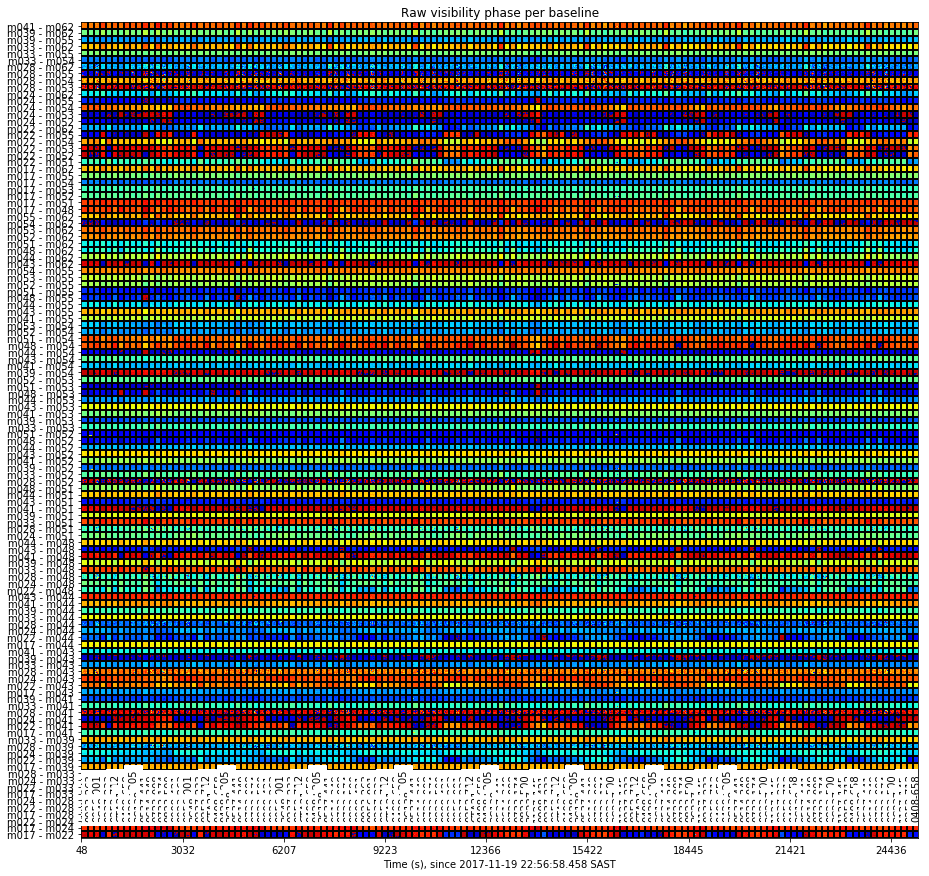

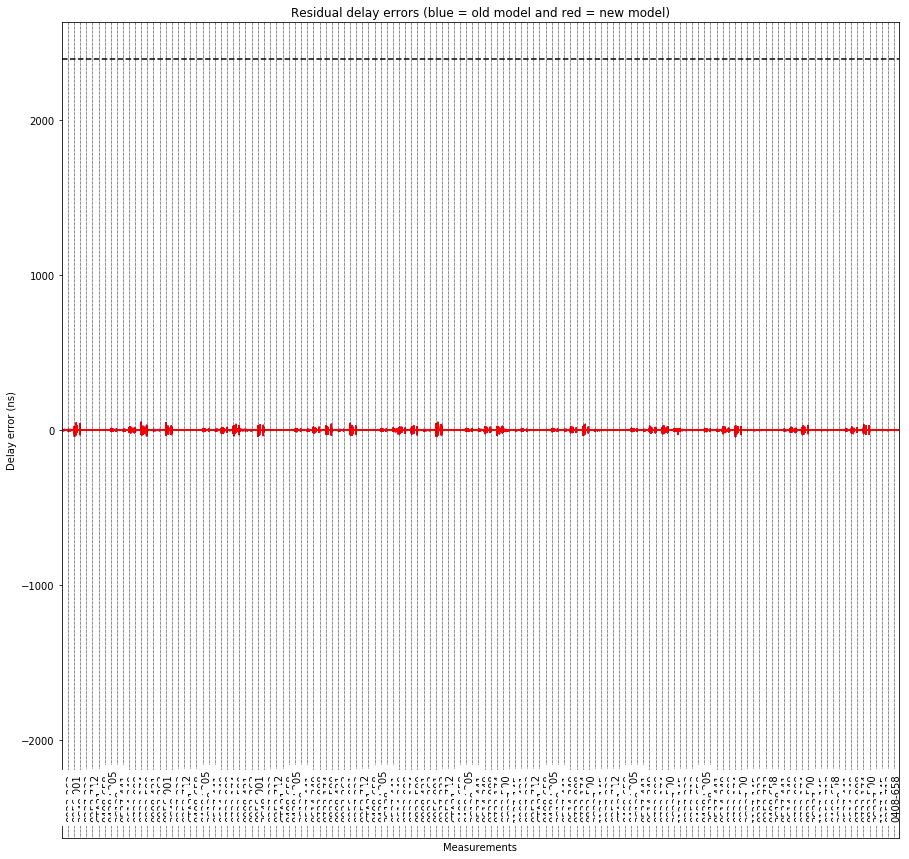

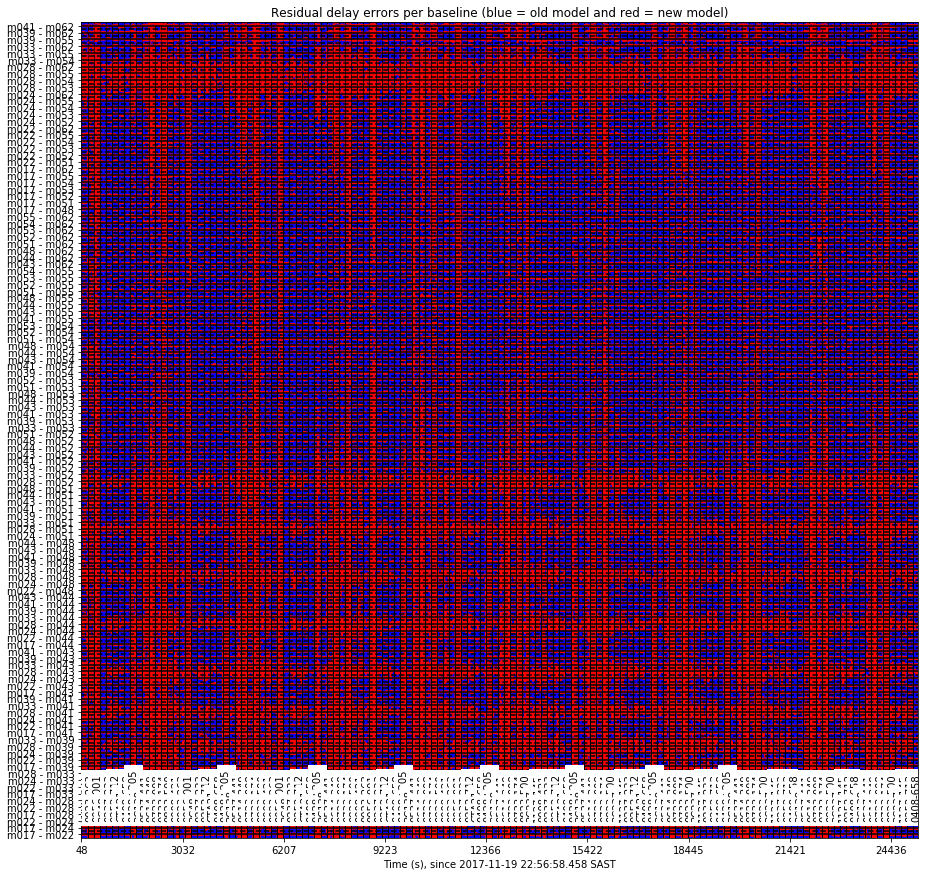

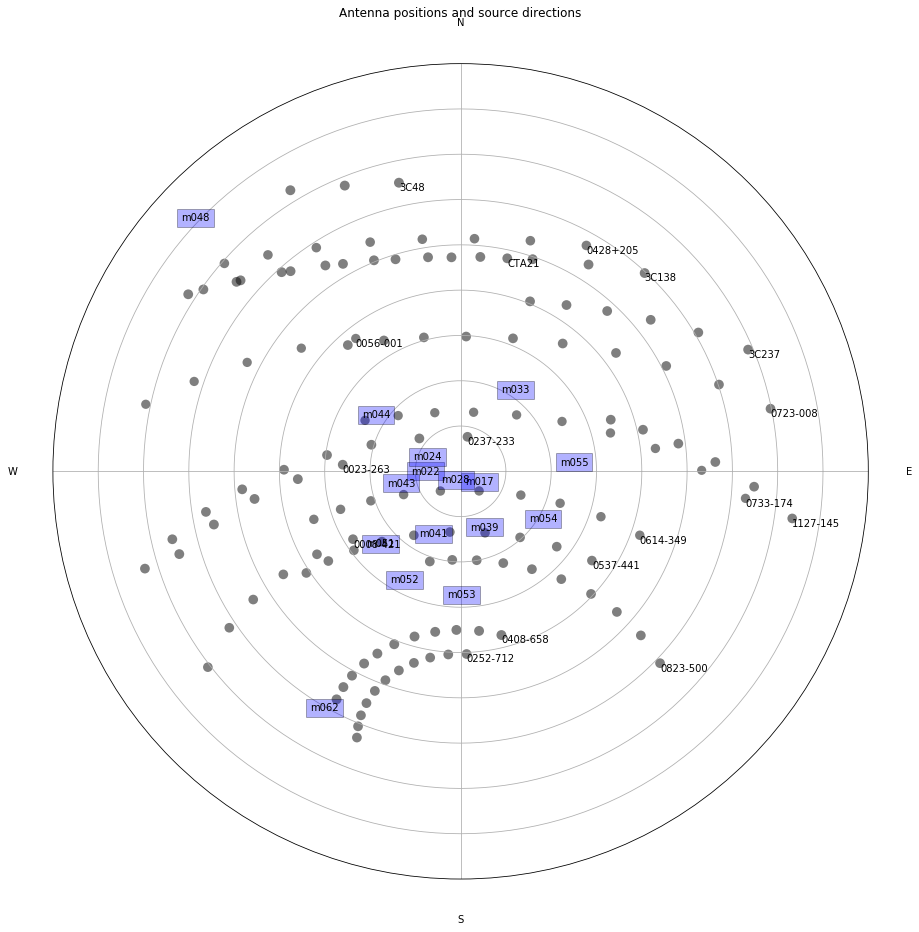

In [11]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run -e /home/tony/Desktop/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2800 -p 'V' -r $ref_ant \
 -a $ants  $h5_filename


In [12]:
print "Finished plots"

Finished plots


In [ ]:
res_h = !python /home/tony/Desktop/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2800 -p 'H' -r $ref_ant -a $ants $h5_filename
print "finished_h"
print res_h

In [ ]:
res_v = !python /home/tony/Desktop/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2800 -p 'V' $ref_ant -a $ants $h5_filename
print "finished_v"
print res_h

In [ ]:
delays_v = {}
for i,r in enumerate(res_v):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_v[ant] = {}
        delays_v[ant]['E'] = float(res_v[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['N'] = float(res_v[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['U'] = float(res_v[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['D'] = float(res_v[i+5].split(':')[1].lstrip().split(' ')[0])
delays_v

In [ ]:
delays_h = {}
for i,r in enumerate(res_h):
    if r.startswith('Antenna'):
        ant = r[8:12]
        print ant
        delays_h[ant] = {}
        delays_h[ant]['E'] = float(res_h[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['N'] = float(res_h[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['U'] = float(res_h[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['D'] = float(res_h[i+5].split(':')[1].lstrip().split(' ')[0])
delays_h


In [ ]:
# write solutions to file
matchRe = re.findall('[0-9]{10,}', h5_filename)
filename='delay_file_'+''.join(matchRe)+'.txt'

with open(filename, 'w') as f:
    for h,v in zip(delays_h,delays_v):
        print >> f, h,v, mean([delays_h[h]['E'],delays_v[v]['E']]) , \
                    mean([delays_h[h]['N'],delays_v[v]['N']]), \
                    mean([delays_h[h]['U'],delays_v[v]['U']]), \
                    delays_h[h]['D'],delays_v[v]['D']
    f.close()

In [ ]:
print delays_h
print delays_v

In [ ]:
# sort delay file by antenna name and load antennaLOC
sample = open(filename, 'r')
sorter = csv.reader(sample, delimiter=' ')
sort = sorted(sorter, key=operator.itemgetter(1))

with open('ant_loc.csv', 'r') as f:
    tocs = f.read()

In [ ]:
cols = ['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
df = pd.DataFrame(columns=cols)
for line in sort:
    p = re.compile(line[0]+',\s+\d{4}\.\d{1,3}')
    toc = float(p.search(tocs).group()[6:])
    df = df.append(pd.Series(
                             [
                                line[0],
                                line[-2],
                                line[2],
                                line[3],
                                line[4], 
                                toc
                             ], 
                              index=['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
                            ), ignore_index = True)

In [ ]:
deltaTOC, deltaUP = [], []
deltaTOC.append(0)
deltaUP.append(0)
for i in range(1, len(df.TOC[1:])+1):
    deltaTOC.append(df.TOC[i] - df.TOC[i-1])
    deltaUP.append(float(df.UP[i]) - float(df.UP[i-1]))

em  = [' ' for i in range(len(deltaUP))]
df[' '] =  pd.Series(em,  index = df.index)

df['delta UP']  = pd.Series(deltaUP,  index = df.index)
df['delta TOC'] = pd.Series(deltaTOC, index = df.index)

print('\nDelay Solutions and antenna locations\n')


In [ ]:
# send file to ops server to process and push to github

opsServer='ops.kat.ac.za'
rPath='/home/kat/ops_team_sw/utilities/update_delay_models'
cmd = "sshpass -p {} scp -r {} kat@{}:{}".format('kat', filename, opsServer, rPath)
system(cmd)
